In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

# グラフの種類

- 折れ線グラフ
- 棒グラフ
- 散布図
- ヒストグラム
- 円グラフ

# シリーズからグラフ


# データフレームからグラフ


# 書式

- マーカー
- 線の種類・色
- 縦軸
- 横軸
- 


# 日本語でラベル表示




In [4]:
ser = pd.Series([1, 2, 3])

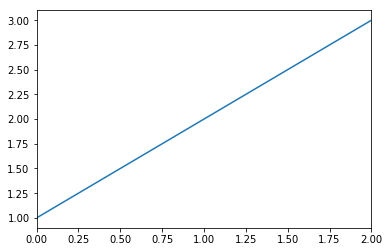

In [5]:
ser.plot()

In [6]:
df = pd.DataFrame({'a': [1, 2, 3], 'b': [1.5, 2.0, 2.5]})

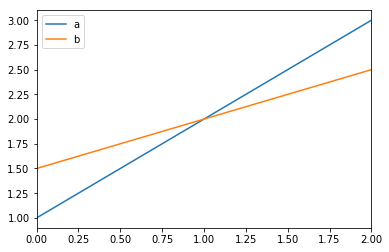

In [7]:
df.plot()

In [8]:
df_2017_fix = pd.read_pickle("df_2017.db")

In [9]:
df_2017_fix.head()

date     歩数  摂取カロリー  平均気温  最高気温 最低気温
0 2017-04-01   5439    2500   6.3   8.9  4.6
1 2017-04-02   2510    2300   8.7  14.2  4.6
2 2017-04-03  10238    1950   9.9  16.1  6.4
3 2017-04-04   8209    1850  11.2  17.3  4.5
4 2017-04-05   9434    1930  14.7  20.7  7.7

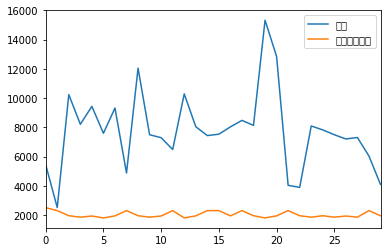

In [10]:
df_2017_fix.plot()

# 散布図の例を作る

In [11]:
df_2017_fix['気温'] = df_2017_fix['平均気温'].astype(np.float)

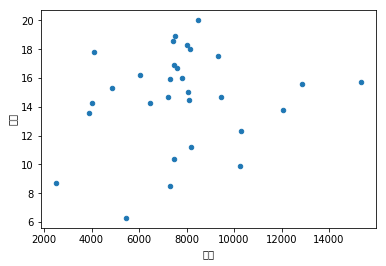

In [12]:
df_2017_fix.plot.scatter(x='歩数', y='気温')

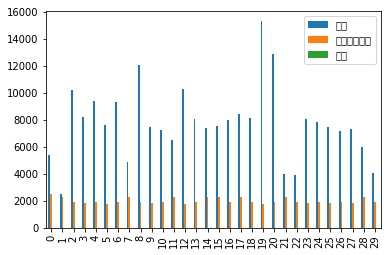

In [13]:
df_2017_fix.plot.bar()

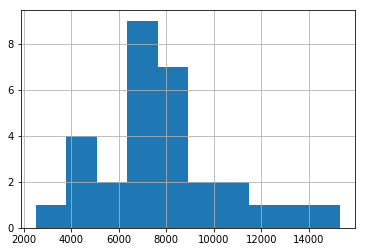

In [14]:
df_2017_fix["歩数"].hist()

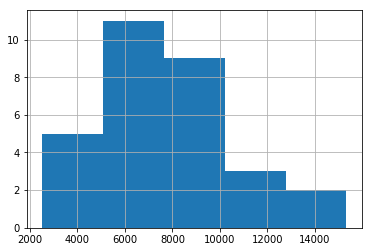

In [15]:
df_2017_fix["歩数"].hist(bins=5)

In [16]:
df_2017_fix["歩数"].mean()

7766.3666666666668

In [17]:
df_2017_fix.describe()

歩数       摂取カロリー         気温
count     30.000000    30.000000  30.000000
mean    7766.366667  2026.666667  14.653333
std     2689.269308   205.549446   3.350629
min     2510.000000  1800.000000   6.300000
25%     6661.500000  1870.000000  13.650000
50%     7561.000000  1945.000000  15.150000
75%     8408.500000  2300.000000  16.850000
max    15328.000000  2500.000000  20.000000

In [18]:
df_2017_fix['歩数'].describe()

count       30.000000
mean      7766.366667
std       2689.269308
min       2510.000000
25%       6661.500000
50%       7561.000000
75%       8408.500000
max      15328.000000
Name: 歩数, dtype: float64

# 円グラフの例を作る

In [19]:
df_2017_fix[:10]['歩数']

0     5439
1     2510
2    10238
3     8209
4     9434
5     7593
6     9320
7     4873
8    12045
9     7493
Name: 歩数, dtype: int64

In [20]:
beginning = df_2017_fix[:10]['歩数'].mean()
middle = df_2017_fix[10:20]['歩数'].mean()
end = df_2017_fix[20:30]['歩数'].mean()

In [21]:
df_201704 = pd.Series([beginning, middle, end], index=['上旬', '中旬', '下旬'])

In [22]:
df_201704

上旬    7715.4
中旬    8703.0
下旬    6880.7
dtype: float64

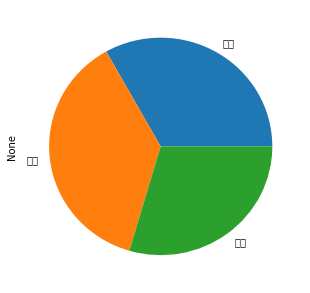

In [23]:
df_201704.plot.pie(figsize=(5, 5))

In [24]:
df_201704.describe()

count       3.000000
mean     7766.366667
std       912.218463
min      6880.700000
25%      7298.050000
50%      7715.400000
75%      8209.200000
max      8703.000000
dtype: float64

# グループ化

In [25]:
df_2017_fix['摂取カロリー']>2000

0      True
1      True
2     False
3     False
4     False
5     False
6     False
7      True
8     False
9     False
10    False
11     True
12    False
13    False
14     True
15     True
16    False
17     True
18    False
19    False
20    False
21     True
22    False
23    False
24    False
25    False
26    False
27    False
28     True
29    False
Name: 摂取カロリー, dtype: bool

In [26]:
df_2017_fix.groupby(df_2017_fix['摂取カロリー']>2000)['date'].count()

摂取カロリー
False    21
True      9
Name: date, dtype: int64

In [27]:
df_2017_fix.groupby(df_2017_fix['摂取カロリー']>2000).mean()

歩数       摂取カロリー         気温
摂取カロリー                                     
False   8580.333333  1900.000000  14.619048
True    5867.111111  2322.222222  14.733333

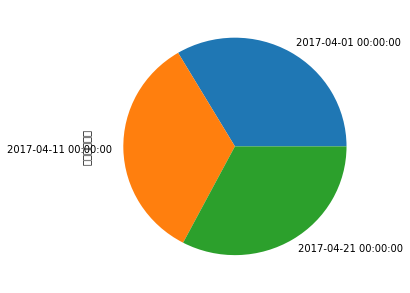

In [29]:
df_2017_fix.groupby(pd.Grouper(key='date', freq="10d"))['摂取カロリー'].mean().plot.pie(figsize=(5, 5))